## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 54](#Problem-54)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.


## Problem 54 <a name="Problem-54"></a>

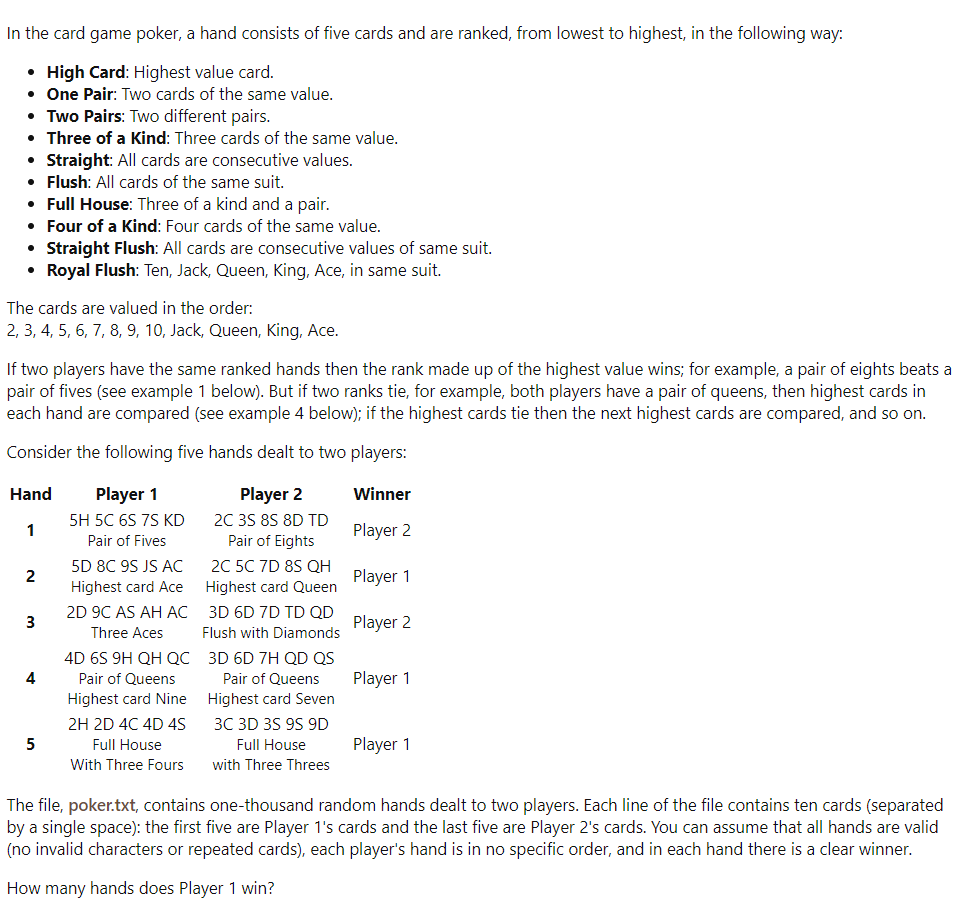

<br>
$**Hint**$

Follow these instructions:
1. Build a dictionary that contains all possible cards with its values
2. Define a function that efficiently gives you the possible rank of a hand based on descriptions.
3. Define a function that efficiently compare 2 hands in a play and tells you which player wins.
4. How many times player 1 wins? count them.

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time

## Main Solution <a name="Main-Solution"></a>
First we difine all possible cards values.

In [ ]:
cards = {'2': 2,
         '3': 3,
         '4': 4,
         '5': 5,
         '6': 6,
         '7': 7,
         '8': 8,
         '9': 9,
         'T': 10,  #in the file given, the number ten is defined with char T
         'J': 11,  #jack
         'Q': 12,  #queen
         'K': 13,  #king
         'A': 14}  #ace

Now Let me define a function that specify the rank of a given hand

In [ ]:
def rank(hand):
    values = [cards[i[0]] for i in hand]
    suits = [i[1] for i in hand]

    value_counts = [values.count(value) for value in set(values)]
    value_counts.sort(reverse=True)

    is_flush = len(set(suits)) == 1
    is_straight = len(set(values)) == 5 and max(values) - min(values) == 4

    if is_flush and is_straight:
        return 9  # Straight Flush
    elif value_counts[0] == 4:
        return 8  # Four of a Kind
    elif value_counts[0] == 3 and value_counts[1] == 2:
        return 7  # Full House
    elif is_flush:
        return 6  # Flush
    elif is_straight:
        return 5  # Straight
    elif value_counts[0] == 3:
        return 4  # Three of a Kind
    elif value_counts[0] == 2 and value_counts[1] == 2:
        return 3  # Two Pairs
    elif value_counts[0] == 2:
        return 2  # One Pair
    else:
        return 1  # High Card

Then we define a function that tells us in a round of play, which player wins

In [ ]:
def compare(hand1,hand2):

    if rank(hand1) > rank(hand2):
        return 1 #player 1 wins

    elif rank(hand1) < rank(hand2):
        return 2 #player 2 wins

    else:
        values1 = sorted(cards[i[0]] for i in hand1)
        values2 = sorted(cards[i[0]] for i in hand2)
        values1.reverse()
        values2.reverse()

        for i in range(len(values1)):
            if values1[i] > values2[i]:
                return 1  #player 1 wins
            elif values1[i] < values2[i]:
                return 2  #player 2 wins

        return 0 #tie

Now all we have to do is to load the data, repeat rounds of play and count how many times player one wins the game.

In [ ]:
start_time = time.time()

count = 0
with open('054_poker.txt', 'r') as file:
    for line in file:
        hands = line.strip().split()
        hand1 = hands[:5]
        hand2 = hands[5:]

        if compare(hand1, hand2) == 1:
            count += 1

answer = count

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 359 
Execution time: 0.0215 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

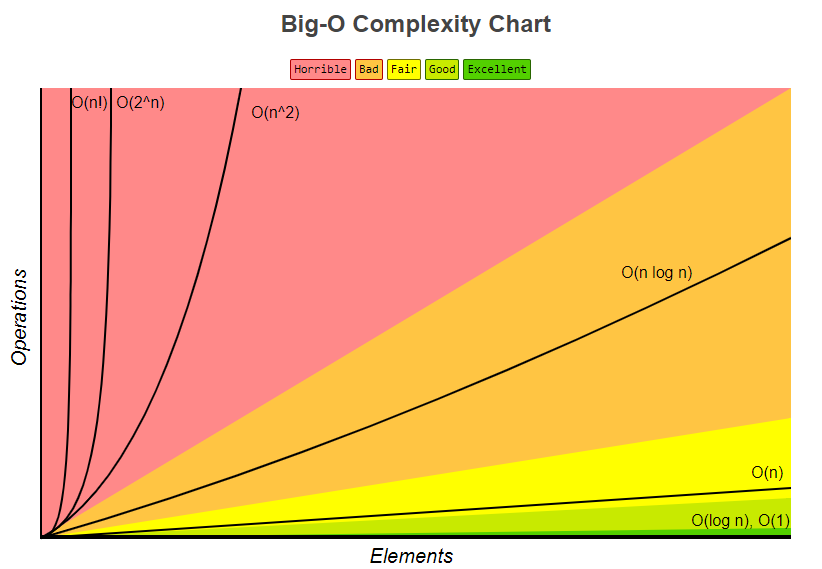

The time complexity of my code depends on the size of the input and the number of cards in a hand. Let's analyze the time complexity of each function:

1. `rank(hand)`: This function calculates the rank of a hand. It performs some list operations such as extracting values and suits, counting value occurrences, and checking for specific patterns. The time complexity of this function is $O(n)$, where $n$ is the number of cards in a hand. It involves iterating over the cards in the hand and performing operations that have a linear time complexity.

2. `compare(hand1, hand2)`: This function compares two hands and determines the winner. It calls the `rank()` function twice and performs additional operations to compare the hands' values. The time complexity of this function depends on the time complexity of the `rank()` function and the sorting operation performed on the values. Therefore, the time complexity is $O(n + m *log(m))$, where $n$ is the number of cards in a hand and $m$ is the number of distinct values in a hand.

3. Main loop: The main loop iterates over the lines in the input file, splits each line into two hands, and compares them using the `compare()` function. The time complexity of this loop depends on the number of lines in the file, which is determined by the number of poker hands to evaluate. If there are $k$ hands in the file, the time complexity of this loop is $O(k * (n + m *log(m)))$.

Overall, the **time complexity* of the entire code is $O(k * (n + m *log(m)))$, where $k$ is the number of poker hands to evaluate, $n$ is the number of cards in a hand, and $m$ is the number of distinct values in a hand.

The space complexity of the code is primarily determined by the storage of the `cards` dictionary, which has a constant number of key-value pairs. Other variables, such as `values`, `suits`, and `value_counts`, store intermediate results based on the input hand and have space proportional to the number of cards in a hand. Therefore, the **space complexity** of the code is $O(n)$, where $n$ is the number of cards in a hand.